# Week 7: Distributional Semantics

This week there is only one Jupyter notebook for you to complete!  

In the lectures, we have introduced the idea of distributional semantics. In a distributional model of meaning, words are represented in terms of their co-occurrences.

However, what does it mean for two words to co-occur together?  Here we are going to look at how the **definition of co-occurrence** used affects the nature of the similarity discovered.  In particular, we are going to contrast *close proximity* co-occurrence (where words co-occur, say, next to each other) with more *distant proximity* (where words co-occur, say, within a window of 10 words).

First, however, we need a corpus.  Here, we are going to work with the Reuters sports corpus.


In [ ]:
#mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#preliminary imports
import sys
import operator
#make sure you append the path where your utils.py file is.
sys.path.append('/content/drive/My Drive/NLENotebooks/resources/')
from utils import *

from sussex_nltk.corpus_readers import ReutersCorpusReader


Sussex NLTK root directory is /content/drive/My Drive/NLENotebooks/resources


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

First, we set up a corpus reader for the sport category of Reuters.  Using the `enumerate_sents()` method we can see it contains over 1 million sentences

In [ ]:
rcr = ReutersCorpusReader().sport()
rcr.enumerate_sents()

1113359

We are going to take a sample of this corpus, tokenize the sentences and carry out text normalization for case and number.  You could increase the samplesize to 10000 (which will be repeated 100 times for a total corpus size of 1000000 sentences) but this will make a noticeable slow-down in the speed of running cells.  Also note, that repeating 100 samples of size 2000 might contain duplicate items.  Don't worry about this - sampling "with replacement" is quite common and allows us to bootstrap estimates of statistics.  However, here, we are doing it because it is faster and so that we can check on progress with a "completed %" statement.

In [ ]:
random.seed(37)  #this will ensure it is the same sample every time you run the cell
samplesize=2000
iterations =100
sentences=[]
for i in range(0,iterations):
    sentences+=[normalise(sent) for sent in rcr.sample_sents(samplesize=samplesize)]
    print("Completed {}%".format(i))

Completed 0%
Completed 1%
Completed 2%
Completed 3%
Completed 4%
Completed 5%
Completed 6%
Completed 7%
Completed 8%
Completed 9%
Completed 10%
Completed 11%
Completed 12%
Completed 13%
Completed 14%
Completed 15%
Completed 16%
Completed 17%
Completed 18%
Completed 19%
Completed 20%
Completed 21%
Completed 22%
Completed 23%
Completed 24%
Completed 25%
Completed 26%
Completed 27%
Completed 28%
Completed 29%
Completed 30%
Completed 31%
Completed 32%
Completed 33%
Completed 34%
Completed 35%
Completed 36%
Completed 37%
Completed 38%
Completed 39%
Completed 40%
Completed 41%
Completed 42%
Completed 43%
Completed 44%
Completed 45%
Completed 46%
Completed 47%
Completed 48%
Completed 49%
Completed 50%
Completed 51%
Completed 52%
Completed 53%
Completed 54%
Completed 55%
Completed 56%
Completed 57%
Completed 58%
Completed 59%
Completed 60%
Completed 61%
Completed 62%
Completed 63%
Completed 64%
Completed 65%
Completed 66%
Completed 67%
Completed 68%
Completed 69%
Completed 70%
Completed 71%
Co

In [ ]:
sentences[0]

['``',
 'but',
 'fortunately',
 ',',
 'stairs',
 'hit',
 'the',
 'ball',
 'hard',
 'and',
 'i',
 'charged',
 'it',
 'hard',
 'and',
 'got',
 'rid',
 'of',
 'it',
 'as',
 'quickly',
 'as',
 'i',
 'could',
 'and',
 'made',
 'a',
 'good',
 'throw',
 '.']

### Exercise 1
* Write (or adapt from previous labs) a function to find the frequency distribution of words in the sample of sentences
* Generate a list of the 100 most frequent words in the corpus. 

In [ ]:
def freq_dist(sentences):
    mydict={}
    for sentence in sentences:
        for token in sentence:
            mydict[token]=mydict.get(token,0)+1
    return mydict

def most_frequent(freqdist,k=100):
    return sorted(freqdist.items(),key=operator.itemgetter(1),reverse=True)[:k]

most_frequent(freq_dist(sentences))

[('NUM', 50924),
 ('the', 34078),
 ('.', 32441),
 (',', 28440),
 ('in', 14268),
 ('to', 13053),
 ('a', 12800),
 ('and', 11481),
 ('of', 11097),
 ('(', 10151),
 (')', 10117),
 ('on', 6954),
 ("'s", 6763),
 ('for', 6290),
 ('``', 4845),
 ('with', 4608),
 ('at', 4545),
 ('was', 4379),
 ("''", 4333),
 ('he', 4282),
 ('his', 4272),
 ('said', 3677),
 ('i', 3596),
 (':', 3469),
 ('from', 2734),
 ('-', 2732),
 ('it', 2731),
 ('that', 2729),
 ('is', 2692),
 ('but', 2648),
 ('who', 2643),
 ('first', 2607),
 ('as', 2553),
 ('by', 2536),
 ('after', 2342),
 ('had', 2232),
 ('have', 2102),
 ('be', 2064),
 ('two', 1969),
 ('has', 1957),
 ('their', 1954),
 ('world', 1934),
 ('not', 1854),
 ('last', 1742),
 ('cup', 1710),
 ('second', 1694),
 ('will', 1690),
 ('one', 1639),
 ('an', 1616),
 ('this', 1571),
 ('out', 1563),
 ('beat', 1532),
 ('we', 1474),
 ('when', 1465),
 ('team', 1414),
 ('over', 1413),
 ('three', 1409),
 ('league', 1344),
 ('win', 1323),
 ('they', 1317),
 ('game', 1294),
 ('were', 1254)

### Generating feature representations

We want to be able to consider any words that are in a certain **window** around a target word as features of that word.  The code below demonstrates how to iterate through a sentence and find all of the tokens within a given window of each word.

In [ ]:
tokens=word_tokenize("the moon is blue and made of cheese")

window=2

for i,word in enumerate(tokens):
    print(word,tokens[max(0,i-window):i]+tokens[i+1:i+window+1])

the ['moon', 'is']
moon ['the', 'is', 'blue']
is ['the', 'moon', 'blue', 'and']
blue ['moon', 'is', 'and', 'made']
and ['is', 'blue', 'made', 'of']
made ['blue', 'and', 'of', 'cheese']
of ['and', 'made', 'cheese']
cheese ['made', 'of']


In [ ]:
tokens=word_tokenize("there is always a fat cat sitting on the mat")
window=3
reps={}
for i,word in enumerate(tokens):
    reps[i]=(word,tokens[max(0,i-window):i]+tokens[i+1:i+window+1])
print(reps[1])

('is', ['there', 'always', 'a', 'fat'])


### Exercise 2.1
Write a function `generate_features(sentences,window=1)` which takes
* a list of sentences (where each sentence is a list of tokens); and
* and a window size; 

This function should output
* a dictionary of dictionaries

The key to the outermost dictionary is a word.  The key to each internal dictionary is a another word (a co-occurrence feature).  The value in the internal dictionary should be the number of the times the words co-occur together (within the given window).  

For example, with the sentences in `sents`, your function should generate the following output:

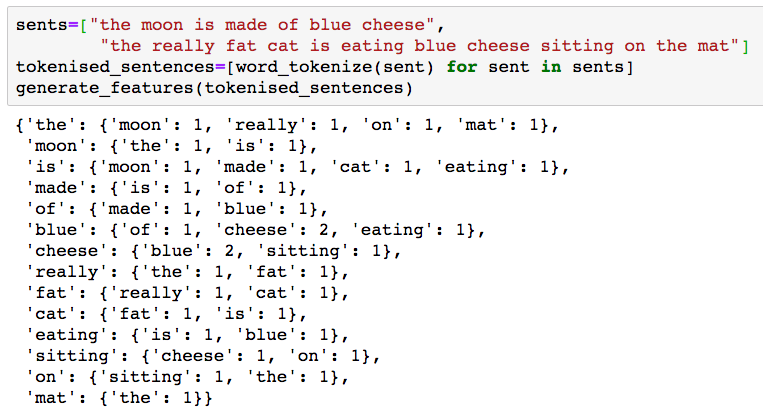


In [ ]:
def generate_features(sentences,window=1):
    mydict={}
    for sentence in sentences:
        for i,token in enumerate(sentence):
            current=mydict.get(token,{})
            features=sentence[max(0,i-window):i]+sentence[i+1:i+window+1]
            for feature in features:
                current[feature]=current.get(feature,0)+1
            mydict[token]=current
    return mydict

In [ ]:
sents=["the moon is made of blue cheese",
        "the really fat cat is eating blue cheese sitting on the mat"]
tokenised_sentences=[word_tokenize(sent) for sent in sents]
generate_features(tokenised_sentences)

{'blue': {'cheese': 2, 'eating': 1, 'of': 1},
 'cat': {'fat': 1, 'is': 1},
 'cheese': {'blue': 2, 'sitting': 1},
 'eating': {'blue': 1, 'is': 1},
 'fat': {'cat': 1, 'really': 1},
 'is': {'cat': 1, 'eating': 1, 'made': 1, 'moon': 1},
 'made': {'is': 1, 'of': 1},
 'mat': {'the': 1},
 'moon': {'is': 1, 'the': 1},
 'of': {'blue': 1, 'made': 1},
 'on': {'sitting': 1, 'the': 1},
 'really': {'fat': 1, 'the': 1},
 'sitting': {'cheese': 1, 'on': 1},
 'the': {'mat': 1, 'moon': 1, 'on': 1, 'really': 1}}

## Pointwise Mutual Information (PMI)
So far, we have calculated the frequency of two events occurring together.  For example, we can see how often the word 'tennis' appears in the window around the word 'player'

In [ ]:
reps=generate_features(sentences,window=1)
reps['player']['tennis']

10

We use positive pointwise mutual information (PPMI) to establish how **significant** a given frequency of co-occurrence is.  If player and tennis are both very common words then their co-occurring together 10 times may be insignificant.  However, if they are rare words, then a co-occurrence of 10 should be considered as more important in the representation of each word.  PMI can be calculated as follows:

\begin{eqnarray*}
PMI(word,feat) = \frac{\mbox{freq}(word,feat) \times \Sigma_{w*,f*} \mbox{freq}(w*,f*)}{\Sigma_{f*} \mbox{freq}(word,f*) \times \Sigma_{w*} \mbox{freq}(w*,feat)}
\end{eqnarray*}


In order to carry out this calculation, we can see that we need the frequency of the co-occurrence *player* and *tennis*, the total number of times *player* has occurred with any feature, the total number of times *tennis* has occurred as a feature and the grand total of all possible co-occurrences.  We can keep track of these totals as we build the feature representations.


## Exercise 3.1
Create a class `word_vectors`.  This should be initialised with a list of sentences and a desired window size.  On initialisation, the feature representations of all words, together with word totals and feature totals should be generated and stored in the object as
* self.reps (the feature representations: a dictionary of dictionaries}
* self.wordtotals (the frequency of each word: a dictionary of integers (with the same keys as self.reps)
* self.feattotals (the frequency of each feature: a dictionary of integers (with the same keys as the dictionaries indexed by self.reps)

Generate vectors from the sample sentences with a window_size of 3.  If you look at the representation of `player`, you should find that the feature `australian` has the value 17.  The total frequency of features for the word `player` is 2722, and the total frequency of occurrences of the feature `australian` is 2220

In [ ]:
class word_vectors:
    def __init__(self,sentences,window=3):
        self.sentences=sentences
        self.window=window
        self.reps={}
        self.wordtotals={}
        self.feattotals={}
        self.generate_features()
        self.grandtotal=sum(self.wordtotals.values())
    
    def generate_features(self):
        for sentence in self.sentences:
            for i,token in enumerate(sentence):
                current=self.reps.get(token,{})
                features=sentence[max(0,i-self.window):i]+sentence[i+1:i+self.window+1]
                for feature in features:
                    current[feature]=current.get(feature,0)+1
                    self.feattotals[feature]=self.feattotals.get(feature,0)+1
                self.wordtotals[token]=self.wordtotals.get(token,0)+len(features)
                self.reps[token]=current


In [ ]:
vectors_3=word_vectors(sentences)
print(vectors_3.reps['player']['australian'])
print(vectors_3.wordtotals['player'])
print(vectors_3.feattotals['australian'])

17
2722
2220


In [ ]:
vectors_4=word_vectors(sentences,4)
print(vectors_4.reps['player']['australian'])
print(vectors_4.wordtotals['player'])
print(vectors_4.feattotals['australian'])

19
3528
2863


## Positive PMI (PPMI)
We now want to convert the representation of each word from a representation based on frequency to one based on PMI.  In fact, we want to ignore any features so we use **positive PMI**

\begin{eqnarray*}
\mbox{PPMI}(word,feat)=
\begin{cases}PMI(word,feat),& \mbox{if PMI}(word,feat)>0\\
=0,& \mbox{otherwise}
\end{cases}
\end{eqnarray*}

### Exercise 3.2
Now add a method to your `word_vectors` class which will calculate the PPMI value for each feature in each vector.

The PPMI between `player` and `australian` should be 3.49

In [ ]:
class word_vectors:
    def __init__(self,sentences,window=3):
        self.sentences=sentences
        self.window=window
        self.reps={}
        self.wordtotals={}
        self.feattotals={}
        self.generate_features()
        self.grandtotal=sum(self.wordtotals.values())
    
    def generate_features(self):
        for sentence in self.sentences:
            for i,token in enumerate(sentence):
                current=self.reps.get(token,{})
                features=sentence[max(0,i-self.window):i]+sentence[i+1:i+self.window+1]
                for feature in features:
                    current[feature]=current.get(feature,0)+1
                    self.feattotals[feature]=self.feattotals.get(feature,0)+1
                self.wordtotals[token]=self.wordtotals.get(token,0)+len(features)
                self.reps[token]=current

    def convert_to_ppmi(self):
        self.ppmi={word:{feat:max(0,math.log((freq*self.grandtotal)/(self.wordtotals[word]*self.feattotals[feat]),2)) for (feat,freq) in rep.items()} for (word,rep) in self.reps.items()}
        
        
        
        

In [ ]:
vectors_3=word_vectors(sentences)
vectors_3.convert_to_ppmi()
print(vectors_3.ppmi['player']['australian'])

3.489433105573824


## Word Similarity
We are going to use cosine similarity to compute the similarity between two word vectors.  

First lets define a function to compute the dot product of two vectors. This could be imported or copied from Lab_4_2.  However, an implementation is given to you below which you can use.

In [ ]:
def dot(vecA,vecB):
    the_sum=0
    for (key,value) in vecA.items():
        the_sum+=value*vecB.get(key,0)
    return the_sum


### Exercise 4.3

* Add a `similarity` method to your word_vectors class to enable you to calculate the similarity between two word representations.
* You should find similarity between `australian` and `african` is 0.05

In [ ]:
vectors_1.nearest_neighbours('australian')

In [ ]:
vectors_3=word_vectors(sentences)
vectors_3.convert_to_ppmi()
print(vectors_3.similarity('african','australian'))

0.0502158344881147


## Nearest Neighbours
We now want to be able to find the nearest neighbours of a given word.  In order to do this we need to find its similarity with every other word in a set of *candidates* and then rank them by similarity.

### Exercise 5.2
* Add functionality to your `word_vectors` class to be enable you to find the *k* nearest neighbours of any words.   You can improve efficiency by only considering the 1000 most frequent words as *candidates*
* Use your functionality investigate the effect of increasing the window size on the neighbourhood of a word.  You should consider at least:
    * the words \['australian', 'football'\]
    * the neighbourhood sizes: window = \[1, 10\]
* Comment on the differences.

In [ ]:
class word_vectors:
    def __init__(self,sentences,window=3):
        self.sentences=sentences
        self.window=window
        self.reps={}
        self.wordtotals={}
        self.feattotals={}
        self.generate_features()
        self.grandtotal=sum(self.wordtotals.values())
        self.convert_to_ppmi()
    
    def generate_features(self):
        for sentence in self.sentences:
            for i,token in enumerate(sentence):
                current=self.reps.get(token,{})
                features=sentence[max(0,i-self.window):i]+sentence[i+1:i+self.window+1]
                for feature in features:
                    current[feature]=current.get(feature,0)+1
                    self.feattotals[feature]=self.feattotals.get(feature,0)+1
                self.wordtotals[token]=self.wordtotals.get(token,0)+len(features)
                self.reps[token]=current

    def convert_to_ppmi(self):
        self.ppmi={word:{feat:max(0,math.log((freq*self.grandtotal)/(self.wordtotals[word]*self.feattotals[feat]),2)) for (feat,freq) in rep.items()} for (word,rep) in self.reps.items()}
    
    def similarity(self,word1,word2):
        rep1=self.ppmi.get(word1,{})
        rep2=self.ppmi.get(word2,{})
        return dot(rep1,rep2)/math.sqrt(dot(rep1,rep1)*dot(rep2,rep2))
    
    def nearest_neighbours(self,word1,n=1000,k=10):
        candidates=sorted(self.wordtotals.items(),key=operator.itemgetter(1),reverse=True)[:n]
        sims=[(cand,self.similarity(word1,cand)) for (cand,_) in candidates]
        return sorted(sims,key=operator.itemgetter(1),reverse=True)[:k]
    
    

In [ ]:
vectors_1=word_vectors(sentences,window=1)



In [ ]:
vectors_1.nearest_neighbours('australian')

[('australian', 1.0),
 ('federation', 0.10592282076200224),
 ('english', 0.08918085260189733),
 ('french', 0.08311942479647166),
 ('german', 0.07777567095727195),
 ('union', 0.07760159677141115),
 ('spanish', 0.0775237019573614),
 ('pakistan', 0.07662033494013813),
 ('team', 0.07497072432639153),
 ('sydney', 0.07122244299287335)]

In [ ]:
vectors_1.nearest_neighbours('football')

[('football', 1.0),
 ('soccer', 0.130756274764439),
 ('basketball', 0.1283047842623324),
 ('cricket', 0.1196018755483839),
 ('hockey', 0.1193228465423947),
 ('league', 0.09169544241768929),
 ('championship', 0.09078895335868173),
 ('athletic', 0.0889010340119325),
 ('national', 0.08833930452823713),
 ('tennis', 0.08362054643501361)]

In [ ]:
vectors_10=word_vectors(sentences,window=10)

In [ ]:
vectors_10.nearest_neighbours('australian')

[('australian', 1.0),
 ('league', 0.16830546448444234),
 ('football', 0.1669265539825104),
 ('yesterday', 0.14985561892885618),
 ('super', 0.1332991855151373),
 ('cricket', 0.1298581878664892),
 ('rugby', 0.12780628831053148),
 ('player', 0.12547133338343297),
 ('will', 0.1236799596217075),
 ('sydney', 0.12165218063537458)]

In [ ]:
vectors_10.nearest_neighbours('football')

[('football', 1.0),
 ('australian', 0.16692655398251036),
 ('league', 0.15382231960617093),
 ('association', 0.14900386884265357),
 ('union', 0.13525808570462844),
 ('federation', 0.11588310154672683),
 ('player', 0.11479966426419205),
 ('is', 0.11014111719989729),
 ('club', 0.10181671135283235),
 ('english', 0.0992199781294512)]

Code below is example possibilities I use in the lecture (choose which of these correctly calculates PPMI for the representations)

In [ ]:
import math

reps={'tennis':{'player':1}}
wordtotals={'tennis':250}
feattotals={'player':500}
grandtotal=100000

ppmi={word:{feat:max(0,math.log((value*grandtotal)/(wordtotals[word]*feattotals[feat]),2)) 
            for feat,value in rep.items()} for word,rep in reps.items()}

ppmi

{'tennis': {'player': 0}}

In [ ]:

ppmi={word:{feat:min(0,math.log((value*grandtotal)/(wordtotals[word]*feattotals[feat]),2)) 
            for feat,value in rep.items()} for word,rep in reps.items()}

ppmi

{'tennis': {'player': -0.3219280948873623}}

In [ ]:

ppmi={word:{feat:max(0,math.log(value*grandtotal/wordtotals[word]*feattotals[feat],2)) 
            for feat,value in rep.items()} for word,rep in reps.items()}

ppmi

{'tennis': {'player': 17.609640474436812}}

In [ ]:

ppmi={word:{feat:math.log((value*grandtotal)/(wordtotals[word]*feattotals[feat])) 
            for feat,value in rep.items()} for word,rep in reps.items()}

ppmi

{'tennis': {'player': -0.2231435513142097}}

In [ ]:

ppmi={word:{feat:math.log((value*grandtotal)/(wordtotals[word]*feattotals[feat])) 
            for feat,value in rep} for word,rep in reps.items()}

ppmi

ValueError: too many values to unpack (expected 2)